# SUPPLY CHAIN MANAGEMENT SYSTEM

In response to challenges faced by a Fast Moving Consumer Goods (FMCG) company in managing their instant noodles business, this project aims to build a model, using historical data that will determine an optimum weight of the product to be shipped each time from the respective warehouse. Over the past two years, the company's higher management has noticed that there is a mismatch in the demand and supply. Where the demand is high, supply is pretty low and vice-versa which results in a loss in inventory cost and ultimately loss to the company. Hence, the higher management wants to optimize the supply quantity in each and every warehouse in the entire country. To address this issue, a comprehensive data science approach was undertaken, focusing on Exploratory Data Analysis (EDA), data processing, model building, evaluation, and visualization. The dataset comprises of crucial attributes such as warehouse details, geographical factors, and historical performance metrics. Here, we use supervised regression algorithms such as linear regression, decision tree, random forest, AdaBoost, Gradient Boosting and Support Vector Machine. The project aimed to uncover hidden patterns, trends, and insights within the data to make informed decisions regarding inventory management and supply chain optimization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.Exploratory data analysis

In [2]:
# Training dataset
train_df=pd.read_csv("supply_train.csv")

In [3]:
train_df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [5]:

train_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [6]:
# count of unique terms in each column
for i in train_df.columns:
    print(f'Column {i} : {train_df[i].nunique()}')

Column Unnamed: 0 : 16620
Column Ware_house_ID : 16620
Column WH_Manager_ID : 16620
Column Location_type : 2
Column WH_capacity_size : 3
Column zone : 4
Column WH_regional_zone : 6
Column num_refill_req_l3m : 9
Column transport_issue_l1y : 6
Column Competitor_in_mkt : 12
Column retail_shop_num : 4356
Column wh_owner_type : 2
Column distributor_num : 56
Column flood_impacted : 2
Column flood_proof : 2
Column electric_supply : 2
Column dist_from_hub : 217
Column workers_num : 60
Column wh_est_year : 28
Column storage_issue_reported_l3m : 37
Column temp_reg_mach : 2
Column approved_wh_govt_certificate : 5
Column wh_breakdown_l3m : 7
Column govt_check_l3m : 32
Column product_wg_ton : 4248


In [7]:
# Show unique values in each column
for column in train_df.columns:
    unique_values = train_df[column].unique()
    print(f' {column} ({train_df[column].dtype}): {unique_values}')


 Unnamed: 0 (int64): [    0     1     2 ... 16617 16618 16619]
 Ware_house_ID (object): ['WH_100000' 'WH_100001' 'WH_100002' ... 'WH_116617' 'WH_116618'
 'WH_116619']
 WH_Manager_ID (object): ['EID_50000' 'EID_50001' 'EID_50002' ... 'EID_66617' 'EID_66618'
 'EID_66619']
 Location_type (object): ['Urban' 'Rural']
 WH_capacity_size (object): ['Small' 'Large' 'Mid']
 zone (object): ['West' 'North' 'South' 'East']
 WH_regional_zone (object): ['Zone 6' 'Zone 5' 'Zone 2' 'Zone 3' 'Zone 1' 'Zone 4']
 num_refill_req_l3m (int64): [3 0 1 7 8 4 6 5 2]
 transport_issue_l1y (int64): [1 0 4 3 2 5]
 Competitor_in_mkt (int64): [ 2  4  3  5  1  8  7  6 10  9 12  0]
 retail_shop_num (int64): [4651 6217 4306 ... 2716 8344 7347]
 wh_owner_type (object): ['Rented' 'Company Owned']
 distributor_num (int64): [24 47 64 50 42 37 38 45 35 31 40 48 26 68 16 28 58 19 49 69 32 25 46 62
 67 21 51 57 59 23 17 56 22 63 30 53 66 36 29 44 55 39 54 33 27 18 65 34
 52 43 70 60 61 41 15 20]
 flood_impacted (int64): [0 1]


In [8]:
#Drop column
train_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
#checking nullvalues
train_df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [10]:
#Handling null values

# Impute missing values with mean for numerical columns
train_df['workers_num'].fillna(train_df['workers_num'].mean(), inplace=True)
train_df['wh_est_year'].fillna(train_df['wh_est_year'].mean(), inplace=True)

# Impute missing values with mode for categorical column
train_df['approved_wh_govt_certificate']=train_df['approved_wh_govt_certificate'].replace(to_replace=np.NaN,value='Not approved')



In [11]:
# Count number of duplicate rows in Training data
train_df.duplicated().sum() 

0

In [12]:
train_df.shape

(16620, 24)

In [13]:
# Load testing data set
test_df=pd.read_csv("supply_test.csv")
test_df

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [14]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    5529 non-null   int64  
 1   Ware_house_ID                 5529 non-null   object 
 2   WH_Manager_ID                 5529 non-null   object 
 3   Location_type                 5529 non-null   object 
 4   WH_capacity_size              5529 non-null   object 
 5   zone                          5529 non-null   object 
 6   WH_regional_zone              5529 non-null   object 
 7   num_refill_req_l3m            5529 non-null   int64  
 8   transport_issue_l1y           5529 non-null   int64  
 9   Competitor_in_mkt             5529 non-null   int64  
 10  retail_shop_num               5529 non-null   int64  
 11  wh_owner_type                 5529 non-null   object 
 12  distributor_num               5529 non-null   int64  
 13  flo

In [15]:
test_df.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [16]:
# Show unique values in each column
for column in test_df.columns:
    unique_values = test_df[column].unique()
    print(f' {column} ({test_df[column].dtype}): {unique_values}')

 Unnamed: 0 (int64): [16621 16622 16623 ... 22147 22148 22149]
 Ware_house_ID (object): ['WH_116621' 'WH_116622' 'WH_116623' ... 'WH_122147' 'WH_122148'
 'WH_122149']
 WH_Manager_ID (object): ['EID_66621' 'EID_66622' 'EID_66623' ... 'EID_72147' 'EID_72148'
 'EID_72149']
 Location_type (object): ['Rural' 'Urban']
 WH_capacity_size (object): ['Large' 'Small' 'Mid']
 zone (object): ['North' 'West' 'South' 'East']
 WH_regional_zone (object): ['Zone 5' 'Zone 6' 'Zone 4' 'Zone 1' 'Zone 2' 'Zone 3']
 num_refill_req_l3m (int64): [5 3 6 1 2 4 7 8 0]
 transport_issue_l1y (int64): [0 2 3 1 4 5]
 Competitor_in_mkt (int64): [3 2 4 5 1 6 8 7 9]
 retail_shop_num (int64): [5590 5856 4803 ... 4542 6080 5268]
 wh_owner_type (object): ['Company Owned' 'Rented']
 distributor_num (int64): [15 40 24 47 60 18 39 22 59 56 38 16 29 20 44 49 37 36 61 32 46 35 51 69
 68 17 28 33 45 53 48 43 64 66 55 25 65 34 63 30 26 50 70 62 27 58 52 41
 54 31 21 42 57 19 67 23]
 flood_impacted (int64): [0 1]
 flood_proof (int6

In [17]:
# drop column unnamed:0
test_df.drop(['Unnamed: 0'],axis=1 ,inplace= True)

In [18]:
#Checking null values
test_df.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      210
wh_est_year                     2685
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     206
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [19]:
#Handling null values

# Impute missing values with mean for numerical columns
test_df['workers_num'].fillna(test_df['workers_num'].mean(), inplace=True)
test_df['wh_est_year'].fillna(test_df['wh_est_year'].mean(), inplace=True)


In [20]:
# Impute missing values with mode for categorical column
test_df['approved_wh_govt_certificate']=test_df['approved_wh_govt_certificate'].replace(to_replace=np.NaN,value='Not approved')


In [21]:
test_df.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [22]:
#Checking duplicated rows.
test_df.duplicated().sum()

0

In [23]:
test_df.shape

(5529, 24)

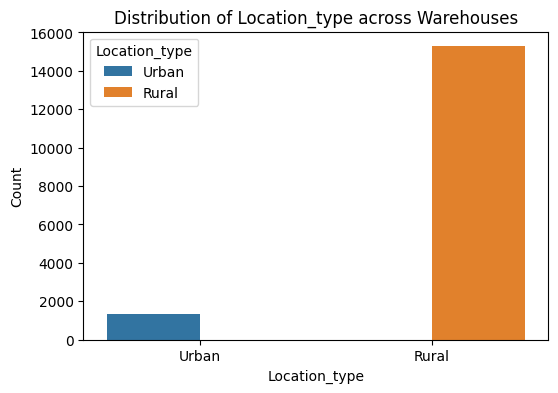

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Location_type', data=train_df, hue='Location_type')
plt.title('Distribution of Location_type across Warehouses')
plt.xlabel('Location_type')
plt.ylabel('Count')
plt.show()



most of the warehouse located in rural.it indicates may be the availability of land and less cost of land enviromentfriendly etc..

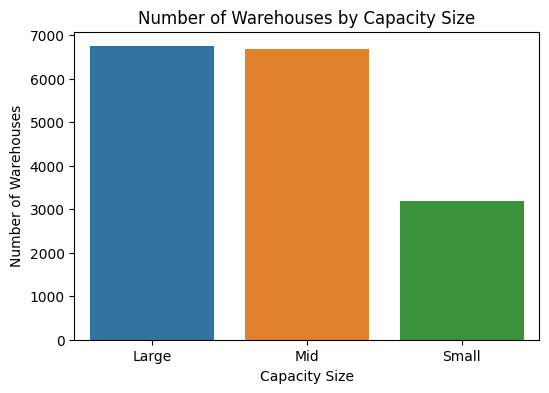

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='WH_capacity_size', data=train_df, order=train_df['WH_capacity_size'].value_counts().index)
plt.title('Number of Warehouses by Capacity Size')
plt.xlabel('Capacity Size')
plt.ylabel('Number of Warehouses')
plt.show()


# Set the style to whitegrid to include grid lines
sns.set(style="darkgrid")

Warehouse capacity size large and mideum,may be it indicates the positive demand of the product.

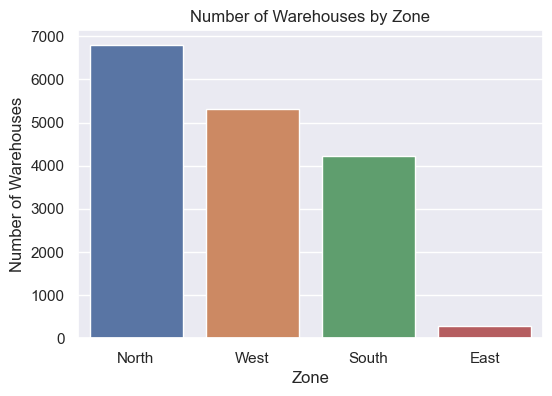

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(x='zone', data=train_df, order=train_df['zone'].value_counts().index)
plt.title('Number of Warehouses by Zone')
plt.xlabel('Zone')
plt.ylabel('Number of Warehouses')
plt.show()



Most of the warehouse located in the northzones and eastzone indicates very less demand of the product.

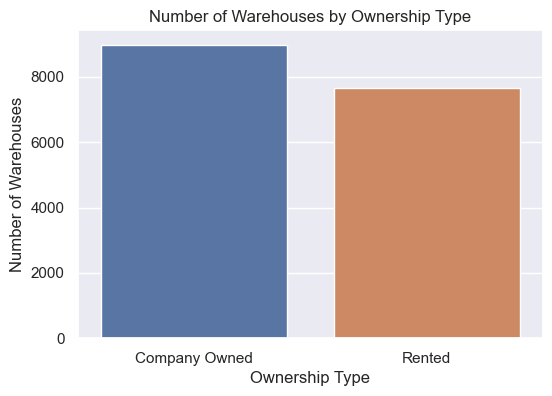

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='wh_owner_type', data=train_df, order=train_df['wh_owner_type'].value_counts().index)
plt.title('Number of Warehouses by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Number of Warehouses')
plt.show()


Companyowned warehouse is somewhat high than rented warehouses.from this we can make a conclusion about that initial cost of company owned warehouse is high but potentially lower ongoing operational costs.but in rented initial cost is less but ongoing renteal expense.there is detailed analysis need the profit of the product and cost related to warehouse to find accurate financial impact.

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_8876\2882817470.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='zone', y='storage_issue_reported_l3m', data=train_df, ci=None)


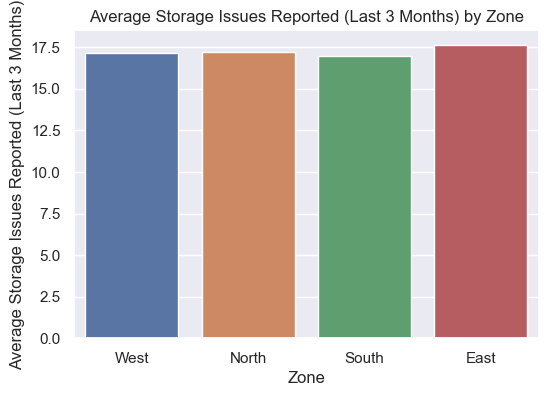

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x='zone', y='storage_issue_reported_l3m', data=train_df, ci=None)
plt.title('Average Storage Issues Reported (Last 3 Months) by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Storage Issues Reported (Last 3 Months)')
plt.show()



Storage issue reported in last 3 month is high in all warehousezones.it indicates various factors may be the higher demand,seasonal fluctuations,product returns,limitations of warehouses etc..

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_8876\2079786787.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='zone', y='wh_breakdown_l3m', data=train_df, ci=None)


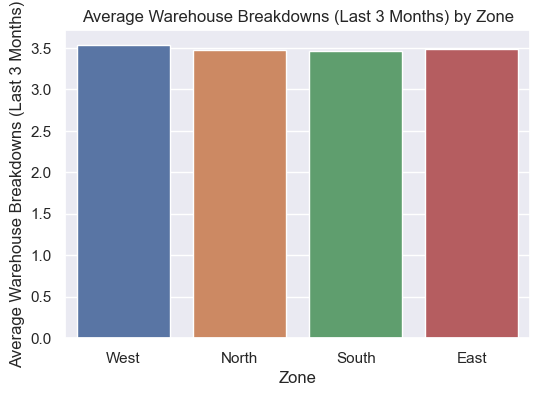

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(x='zone', y='wh_breakdown_l3m', data=train_df, ci=None)
plt.title('Average Warehouse Breakdowns (Last 3 Months) by Zone')
plt.xlabel('Zone')
plt.ylabel('Average Warehouse Breakdowns (Last 3 Months)')
plt.show()


Average breakdown shows very high in all 4 zones.there is detailed study needs what type of breakdown is occuring and what are the protocoals needs for that.

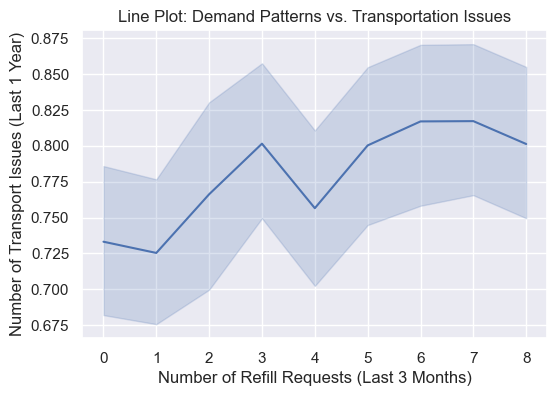

In [30]:
plt.figure(figsize=(6, 4))
sns.lineplot(x='num_refill_req_l3m', y='transport_issue_l1y', data=train_df)
plt.title('Line Plot: Demand Patterns vs. Transportation Issues')
plt.xlabel('Number of Refill Requests (Last 3 Months)')
plt.ylabel('Number of Transport Issues (Last 1 Year)')
plt.show()

The demand of the product and the transport issue has a potential correlation between them.when the demand of the product increases most of the time it afffect the transportation issues also.so  it may affect the consumer satisfication,productdemand.

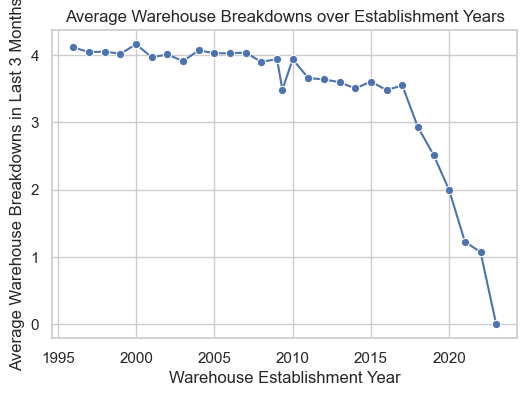

In [31]:

# Set the style of seaborn
sns.set(style="whitegrid")

# Calculate the average breakdowns for each year
avg_breakdowns_by_year = train_df.groupby('wh_est_year')['wh_breakdown_l3m'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(6, 4))
sns.lineplot(x="wh_est_year", y="wh_breakdown_l3m", data=avg_breakdowns_by_year, marker="o", color="b")

# Add labels and title
plt.xlabel("Warehouse Establishment Year")
plt.ylabel("Average Warehouse Breakdowns in Last 3 Months")
plt.title("Average Warehouse Breakdowns over Establishment Years")

# Show the plot
plt.show()





Average breakdown in last 3 months over the establishment years of warehouse implies that,the warehouse before 2015 needs urgent maintainance because it indicates high breakdown.

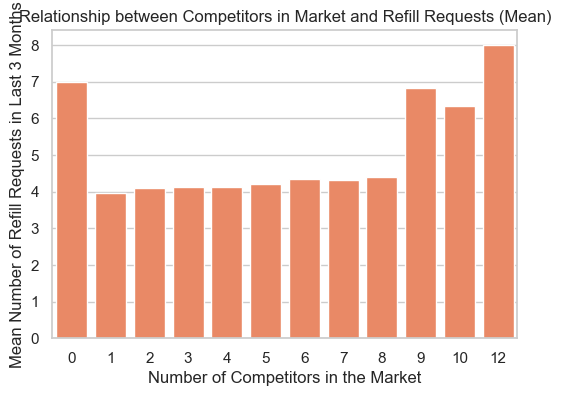

In [32]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Group the data by the number of competitors and calculate the mean refill requests
grouped_data = train_df.groupby('Competitor_in_mkt')['num_refill_req_l3m'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Competitor_in_mkt", y="num_refill_req_l3m", data=grouped_data, color="coral")

# Add labels and title
plt.xlabel("Number of Competitors in the Market")
plt.ylabel("Mean Number of Refill Requests in Last 3 Months")
plt.title("Relationship between Competitors in Market and Refill Requests (Mean)")

# Show the plot
plt.show()


This bardiagram indicates there is a trend increasing of number of competitiors in the market and when the number of competitors increases the demand of the product has the decreasing  tendency .

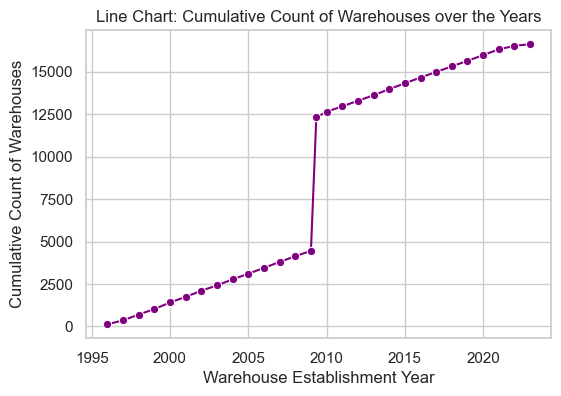

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Group the data by warehouse establishment year and calculate the cumulative count
cumulative_count = train_df.groupby('wh_est_year').size().cumsum().reset_index()

# Create a line chart
plt.figure(figsize=(6, 4))
sns.lineplot(x="wh_est_year", y=0, data=cumulative_count, marker='o', color="purple")

# Add labels and title
plt.xlabel("Warehouse Establishment Year")
plt.ylabel("Cumulative Count of Warehouses")
plt.title("Line Chart: Cumulative Count of Warehouses over the Years")

# Show the plot
plt.show()




This line diagram indicates  number of warehouse is increased over the years.it indiactes the higher demand of the product.

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_8876\2942903624.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='approved_wh_govt_certificate', y='num_refill_req_l3m', data=train_df, ci=None)


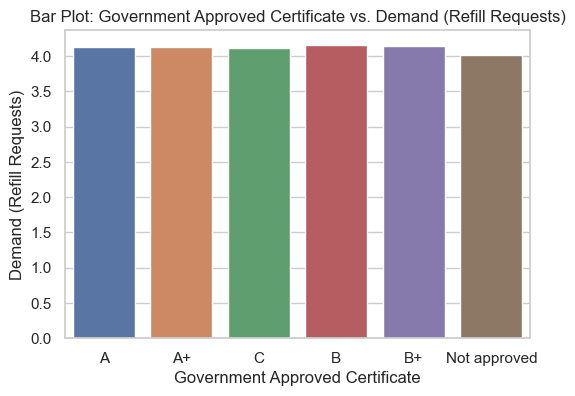

In [34]:
plt.figure(figsize=(6, 4))
sns.barplot(x='approved_wh_govt_certificate', y='num_refill_req_l3m', data=train_df, ci=None)
plt.title("Bar Plot: Government Approved Certificate vs. Demand (Refill Requests)")
plt.xlabel("Government Approved Certificate")
plt.ylabel("Demand (Refill Requests)")
plt.show()


From this bar chart we can understand that goverment approved certificate not affecting the product demand.there is a slight variation only in not approved product.

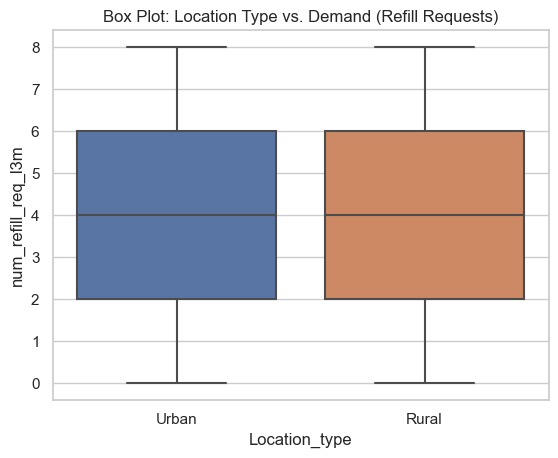

In [35]:
sns.boxplot(x='Location_type', y='num_refill_req_l3m', data=train_df)
plt.title("Box Plot: Location Type vs. Demand (Refill Requests)")
plt.show()


Refill request in both urban and rural region is same.

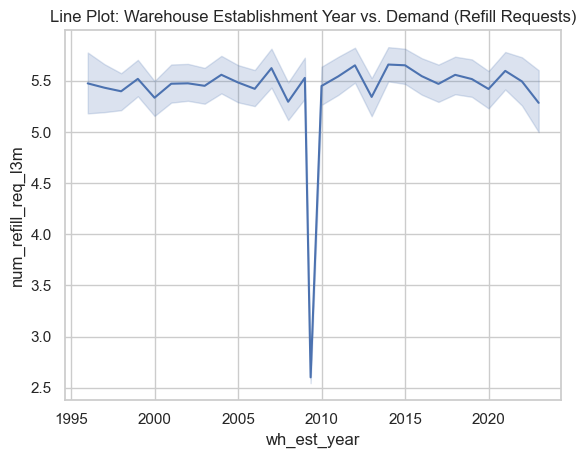

In [36]:
sns.lineplot(x='wh_est_year', y='num_refill_req_l3m', data=train_df)
plt.title("Line Plot: Warehouse Establishment Year vs. Demand (Refill Requests)")
plt.show()


There is high demand in product can be seen over the warehouse establishment year,eventhough smallest up and downs only.IN 2010 only the product demand show a down movement.

C:\Users\ABDUL SAMAD\AppData\Local\Temp\ipykernel_8876\2205444910.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(y='workers_num', x='num_refill_req_l3m', data=train_df, ci=None)


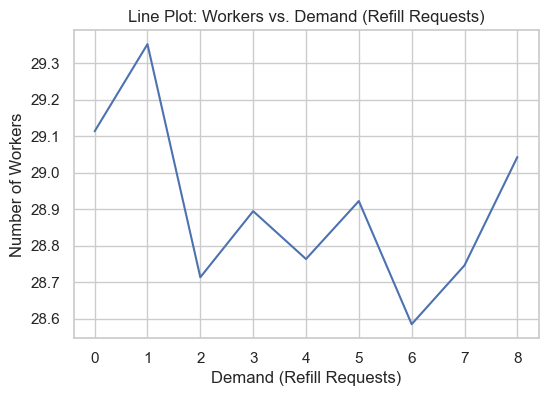

In [37]:
plt.figure(figsize=(6, 4))
sns.lineplot(y='workers_num', x='num_refill_req_l3m', data=train_df, ci=None)
plt.title("Line Plot: Workers vs. Demand (Refill Requests)")
plt.ylabel("Number of Workers")
plt.xlabel("Demand (Refill Requests)")
plt.show()


The demand of the product and the number of workers showing a potential correlation.initially when the demand is less,The number of workers is high ,gradually the demand of the product increses,there is a trend of reducing number of workers.factors like improved operational effeciency,cost management can be influenced by in this trend.

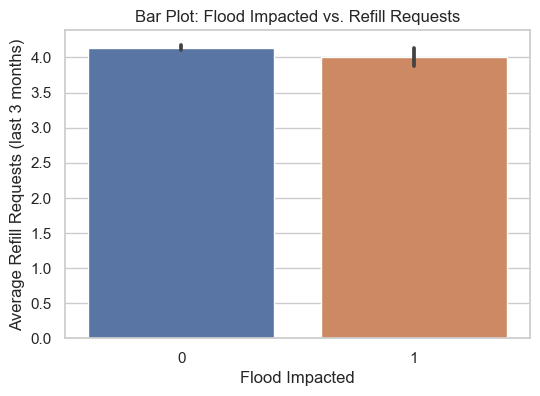

In [38]:
plt.figure(figsize=(6, 4))
sns.barplot(x='flood_impacted', y='num_refill_req_l3m', data=train_df)
plt.title("Bar Plot: Flood Impacted vs. Refill Requests")
plt.xlabel("Flood Impacted")
plt.ylabel("Average Refill Requests (last 3 months)")
plt.show()


The demand of the product in non flooded and flooded regions showing almost similar.eventhough slightly high demand in non flooded regions.

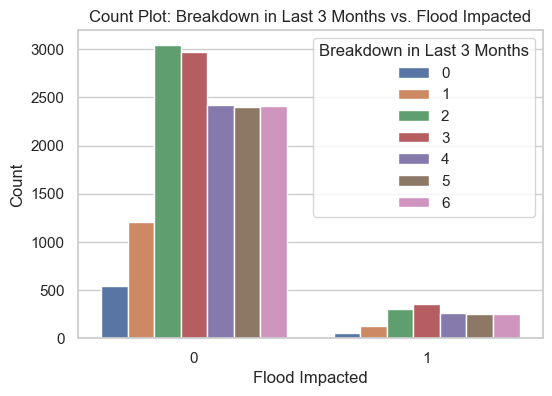

In [39]:
plt.figure(figsize=(6, 4))
sns.countplot(x='flood_impacted', hue='wh_breakdown_l3m', data=train_df)
plt.title("Count Plot: Breakdown in Last 3 Months vs. Flood Impacted")
plt.xlabel("Flood Impacted")
plt.ylabel("Count")
plt.legend(title="Breakdown in Last 3 Months")
plt.show()


This barchart indicating that non flooded region affect very high breakdown than flood impacted region.The reason behind that may be flood-impacted regions have implemented flood-resistant facilities or infrastructure that contributes to lower breakdown rates. Flood-resistant features can enhance the durability and reliability of facilities in challenging environmental conditions.


Based on this Analysis we can make a cnclusion that

 POTENTIAL REASON FOR PRODUCTDEMAND.
 
 1.Consistent demand over years.
 2.Increasing number of warehouses.
 3.Operational Efficiency.
 4.very less breakowns in flooded regions.
 
 POTENTIAL REASON FOR PRODUCTLOSS.
 
 1.Competitive pressure.
 2.Very less demand certain zones.
 3.Highest breakdowns.
 4.Significant downward in 2010.
 5.Incresed transportation issues.
 
   

## 2.Data preprocessing


In [40]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.preprocessing import LabelEncoder

In [42]:

#converting warehouse_id and manager_id into integer datatype by lambda function in training dataset.

train_df['Ware_house_ID'] = train_df['Ware_house_ID'].apply(lambda x: int(x.split('_')[1]))
train_df['WH_Manager_ID'] = train_df['WH_Manager_ID'].apply(lambda x: int(x.split('_')[1]))


In [43]:
train_df[['Ware_house_ID','WH_Manager_ID']].dtypes

Ware_house_ID    int64
WH_Manager_ID    int64
dtype: object

In [44]:
# converting warehouse_id and managerId into integer datatype by lambda function in testing dataset.
test_df['Ware_house_ID']=test_df['Ware_house_ID'].apply(lambda x: int(x.split('_')[1]))
test_df['WH_Manager_ID']=test_df['WH_Manager_ID'].apply(lambda x:int(x.split('_')[1]))

In [45]:
test_df[['Ware_house_ID','WH_Manager_ID']].dtypes

Ware_house_ID    int64
WH_Manager_ID    int64
dtype: object

In [46]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])



In [47]:
train_df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,50000,1,2,3,5,3,1,2,4651,...,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,50001,0,0,1,4,0,0,4,6217,...,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,50002,0,1,2,1,1,0,4,4306,...,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,50003,0,1,1,2,7,4,2,6000,...,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,50004,0,0,1,4,3,1,2,4740,...,1,112,25.0,2009.00000,18,0,4,6,24,24071


In [48]:


# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Identify categorical columns
categorical_columns = test_df.select_dtypes(include=['object']).columns

# Apply label encoding to each categorical column
for col in categorical_columns:
    test_df[col] = label_encoder.fit_transform(test_df[col])



In [49]:
test_df.head()

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,66621,0,0,1,4,5,0,3,5590,...,0,156,30.0,2006.0,24,0,0,2,5,30132
1,116622,66622,0,0,1,4,5,0,2,5856,...,1,79,31.0,2019.0,5,1,4,2,24,6075
2,116623,66623,0,2,1,5,3,0,3,4803,...,1,70,41.0,2008.0,19,1,1,5,9,24076
3,116624,66624,0,1,3,3,5,2,2,4784,...,1,255,33.0,2017.0,9,1,1,3,11,13092
4,116625,66625,1,1,1,3,6,0,4,3699,...,0,205,20.0,1999.0,25,0,2,4,26,29071


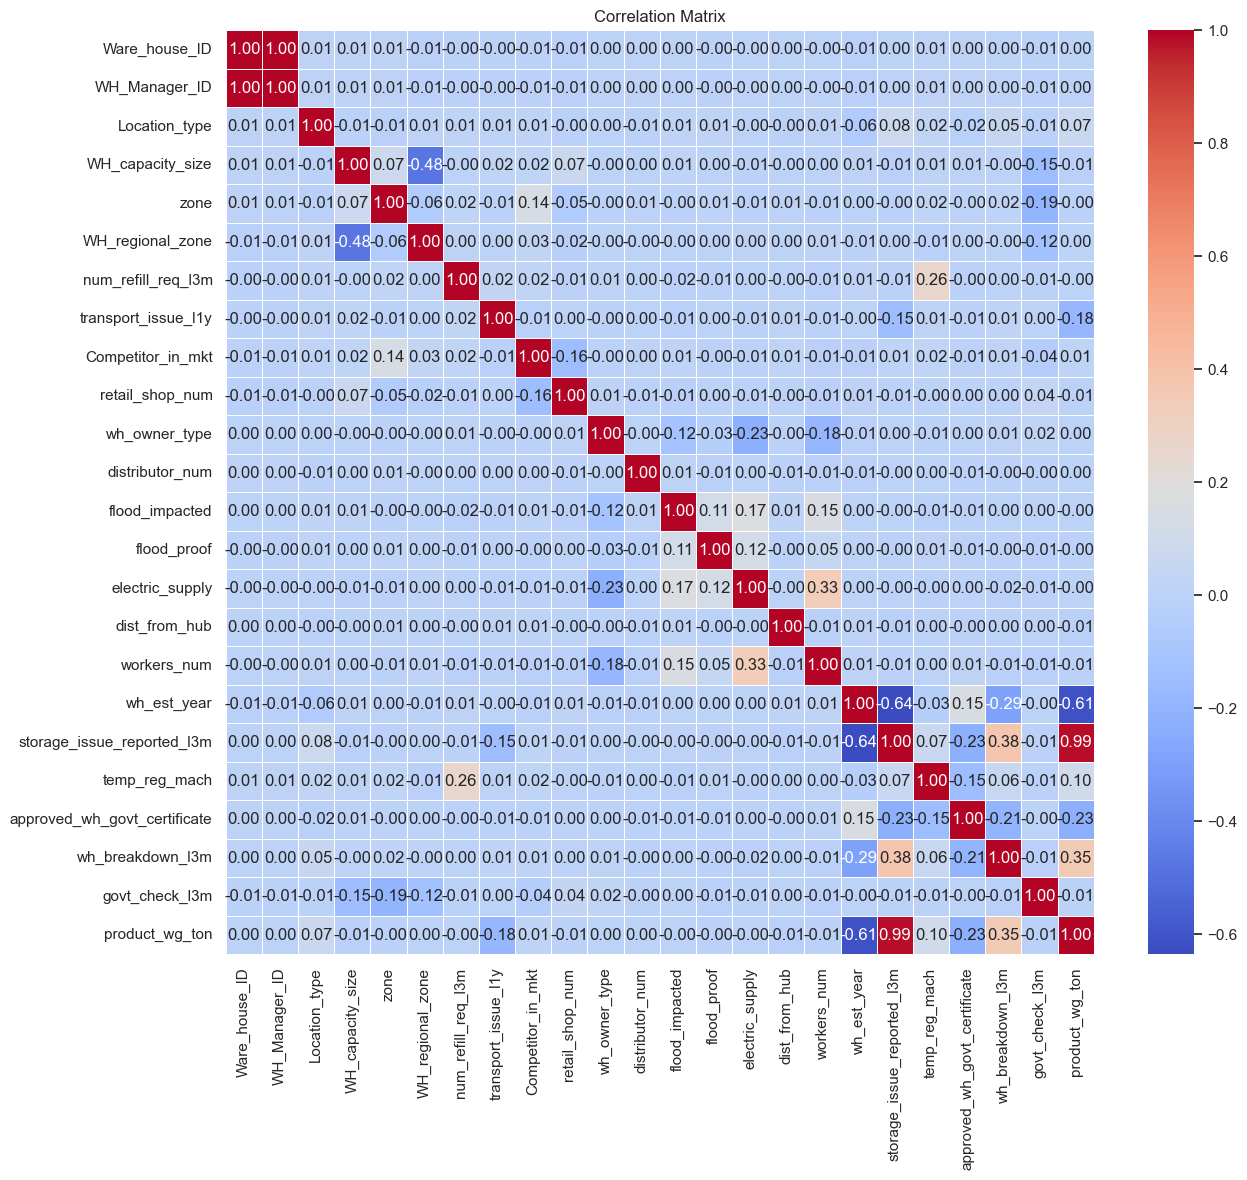

In [50]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()



# Plot the correlation matrix as a heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Here we can understand that there is strong positive correlation between product weight ton and storage issuse reported last 3 month(demand).

The variables with moderate correlation with 1)warehouse breakdown and product weighton,storage issue 2).workers num and electric supply 3)demand and temperature regulation machine.

The variable having strog negative correlation having  whest_year with product weightton,storage issue .and ware house regional zone and capacity size.



## 3.Model building

In [51]:
# Drop less relevant features in training data
train_df=train_df.drop(['WH_Manager_ID','zone', 'WH_capacity_size','flood_proof'], axis = 1)
train_df.head()

,Ware_house_ID,Location_type,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,100000,1,5,3,1,2,4651,1,24,0,1,91,29.0,2009.34532,13,0,0,5,15,17115
1,100001,0,4,0,0,4,6217,0,47,0,1,210,31.0,2009.34532,4,0,0,3,17,5074
2,100002,0,1,1,0,4,4306,0,64,0,0,161,37.0,2009.34532,17,0,0,6,22,23137
3,100003,0,2,7,4,2,6000,1,50,0,0,103,21.0,2009.34532,17,1,1,3,27,22115
4,100004,0,4,3,1,2,4740,0,42,1,1,112,25.0,2009.00000,18,0,4,6,24,24071


In [52]:
# Drop less relevant features in testing data
test_df=test_df.drop(['WH_Manager_ID','zone', 'WH_capacity_size','flood_proof'], axis = 1)
test_df.head()

,Ware_house_ID,Location_type,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,116621,0,4,5,0,3,5590,0,15,0,0,156,30.0,2006.0,24,0,0,2,5,30132
1,116622,0,4,5,0,2,5856,0,40,0,1,79,31.0,2019.0,5,1,4,2,24,6075
2,116623,0,5,3,0,3,4803,1,40,0,1,70,41.0,2008.0,19,1,1,5,9,24076
3,116624,0,3,5,2,2,4784,1,15,0,1,255,33.0,2017.0,9,1,1,3,11,13092
4,116625,1,3,6,0,4,3699,1,24,0,0,205,20.0,1999.0,25,0,2,4,26,29071


In [53]:
# Splitting training data
X_train=train_df.drop(['product_wg_ton'], axis=1)
y_train=train_df['product_wg_ton']

In [54]:
X_train.head(3)

,Ware_house_ID,Location_type,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,100000,1,5,3,1,2,4651,1,24,0,1,91,29.0,2009.34532,13,0,0,5,15
1,100001,0,4,0,0,4,6217,0,47,0,1,210,31.0,2009.34532,4,0,0,3,17
2,100002,0,1,1,0,4,4306,0,64,0,0,161,37.0,2009.34532,17,0,0,6,22


In [55]:
y_train.head(3)

0    17115
1     5074
2    23137
Name: product_wg_ton, dtype: int64

In [56]:
# Splitting testing data
X_test=test_df.drop(['product_wg_ton'], axis=1)
y_test=test_df['product_wg_ton']

In [57]:
X_test.head(3)

,Ware_house_ID,Location_type,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,distributor_num,flood_impacted,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m
0,116621,0,4,5,0,3,5590,0,15,0,0,156,30.0,2006.0,24,0,0,2,5
1,116622,0,4,5,0,2,5856,0,40,0,1,79,31.0,2019.0,5,1,4,2,24
2,116623,0,5,3,0,3,4803,1,40,0,1,70,41.0,2008.0,19,1,1,5,9


In [58]:
y_test.head(3)

0    30132
1     6075
2    24076
Name: product_wg_ton, dtype: int64

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsClassifier



In [60]:
# LINEAR REGRESSION
lr=LinearRegression() # object creation
lr.fit(X_train,y_train) # model building
lr_predict=lr.predict(X_test)
lr_predict

array([31022.77330118,  8168.20723668, 25015.18837843, ...,
       24600.36143278, 16283.77172286, 12983.82291677])

In [61]:
# DECISION TREE
parameter = {
    'criterion': ['mse', 'friedman_mse'],
    'max_depth': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2']
}
dt=DecisionTreeRegressor()
cv = GridSearchCV(dt, parameter, scoring='neg_mean_squared_error', cv=5)
cv.fit(X_train,y_train)

C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
75 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\sit

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='neg_mean_squared_error')

In [62]:
best_model=cv.best_estimator_ # best_estimator_ is a  parameter that finds the best model
best_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5,
                      max_features='sqrt')

In [63]:
dt=DecisionTreeRegressor(criterion='friedman_mse',max_depth=5, max_features='sqrt')
dt.fit(X_train, y_train)
dt_pred=dt.predict(X_test)
dt_pred

array([27647.36325476,  8046.8541526 , 27647.36325476, ...,
       27647.36325476, 18098.63170732, 14058.45883441])

In [64]:
#RANDOM FOREST
param_dist = {
    'n_estimators': [20, 50, 75, 100],
    'max_features': [0.2, 0.5, 0.8, 1],
    'max_depth': [2, 4, 6, 8, None],
    'max_samples': [0.5, 0.65, 0.8, 1]
}

rf = RandomForestRegressor()
cv = RandomizedSearchCV(rf, param_dist, n_iter=10, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
cv.fit(X_train, y_train)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 4, 6, 8, None],
                                        'max_features': [0.2, 0.5, 0.8, 1],
                                        'max_samples': [0.5, 0.65, 0.8, 1],
                                        'n_estimators': [20, 50, 75, 100]},
                   scoring='neg_mean_squared_error')

In [65]:
best_model=cv.best_estimator_ 
best_model

RandomForestRegressor(max_depth=6, max_features=0.5, max_samples=0.65,
                      n_estimators=75)

In [83]:
rf=RandomForestRegressor(max_depth=6,max_features=0.8, max_samples=0.65, n_estimators=70)
rf.fit(X_train, y_train)
rf_pred=rf.predict(X_test)
rf_pred

array([30946.13210105,  6292.90422964, 25130.20598115, ...,
       24212.27974032, 16158.94334321, 13615.19401691])

In [67]:
# ADA BOOST
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}
ada=AdaBoostRegressor()
cv= GridSearchCV(ada, param_grid, scoring='neg_mean_squared_error', cv=5)
cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

In [68]:
best_model=cv.best_estimator_ 
best_model

AdaBoostRegressor(learning_rate=0.1, n_estimators=100)

In [69]:
y_pred = best_model.predict(X_test)
y_pred

array([30120.70384255,  7146.16855865, 23913.59508644, ...,
       26058.28757911, 17385.01465902, 14206.66460905])

In [76]:
# KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Creating KNN Regressor
knn = KNeighborsRegressor()


In [77]:

cv_knn = GridSearchCV(knn, param_grid_knn, scoring='neg_mean_squared_error', cv=5)
cv_knn.fit(X_train, y_train)


C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ABDUL SAMAD\AppData\Local\Programs\Python\Python311\Lib\subprocess.py", line 1024, in __init__
    self._execute_child(args, executable, p

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [79]:
best_knn_model = cv_knn.best_estimator_
best_knn_model

KNeighborsRegressor(n_neighbors=9, p=1, weights='distance')

In [81]:
# Make predictions 
knn_predict = best_knn_model.predict(X_test)
knn_predict

array([24280.00030078, 18696.63958317, 24491.38442983, ...,
       17084.65998743, 25301.35195872, 22897.83939946])

## 4.Model Evaluation.

In [82]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'KNN']
predictions = [lr_predict, dt_pred, rf_pred, y_pred,knn_predict ]

for model_name, pred in zip(models, predictions):
    mse = mean_squared_error(y_test, pred)
    msa=mean_absolute_error(y_test,pred)
    r2 = r2_score(y_test, pred)
    print(f"{model_name} - MSE: {mse}, MSA: {msa}, R2 Score: {r2}")

Linear Regression - MSE: 3091892.0173291625, MSA: 1300.5144921346373, R2 Score: 0.9771982170819157
Decision Tree - MSE: 16393777.421761904, MSA: 2874.030809336068, R2 Score: 0.8791007732859604
Random Forest - MSE: 828967.5544332181, MSA: 680.4763643728639, R2 Score: 0.9938866111376524
AdaBoost - MSE: 2780421.3141033943, MSA: 1326.0028954317845, R2 Score: 0.9794952207678438
KNN - MSE: 135131320.5052312, MSA: 9459.602882603975, R2 Score: 0.003446750945721111



In our analysis of different machine learning algorithms for predicting the optimum product weight for shipment from warehouses, we found that Random Forest emerged as the most effective model. It demonstrated superior predictive capabilities, providing accurate  predictions compared to other algorithms such as Linear Regression, Decision Tree, AdaBoost, and KNN. Random Forest's strong performance makes it the recommended choice for optimizing product weight predictions in this scenario.